In [125]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [126]:
#Reading the data
df=pd.read_csv('diabetes.csv')

In [127]:
#printing first 5 records
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [128]:
#printing last 5 records
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [129]:
#showing descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [130]:
#checking datatypes of each attribute
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [131]:
#checking the schema of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [132]:
#checking if nulls are present
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [133]:
#checking whether the data is binary or multi-class classification
df.Outcome.unique()

array([1, 0], dtype=int64)

In [134]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 0, "['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']")

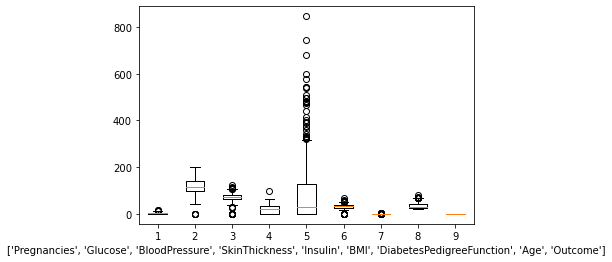

In [135]:
plt.boxplot(df,notch=None,vert=None,widths=None,patch_artist=None)
plt.xlabel(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

In [136]:
#removing outliers from the data
cols=['BloodPressure','Insulin','BMI']
Q1=df[cols].quantile(0.25)
Q3=df[cols].quantile(0.75)
IQR=Q3-Q1
ll=Q1-1.5*IQR
ul=Q3+1.5*IQR
df1=df[~((df[cols]<ll) | (df[cols]>ul)).any(axis=1)]

In [137]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,3.864905,118.991189,72.105727,20.820852,65.681351,32.068429,0.466558,33.256975,0.328928
std,3.364077,31.440606,11.369230,15.579594,79.853578,6.425028,0.314758,11.689489,0.470169
min,0.000000,0.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.245000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,36.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,120.000000,36.100000,0.613000,41.000000,1.000000
max,17.000000,199.000000,106.000000,99.000000,318.000000,50.000000,2.288000,81.000000,1.000000


In [138]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [139]:
df1.dropna(inplace=True)

In [140]:
#storing independent attributes into X
X=df1.drop('Outcome',axis='columns')
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [141]:
#storing dependent attribute in y
y=df1['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [142]:
#splitting the data as training (80%) and testing set(20%)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [143]:
print('X_train size=',X_train.shape)
print('X_test size=',X_test.shape)
print('y_train size=',y_train.shape)
print('y_test size=',y_test.shape)

X_train size= (544, 8)
X_test size= (137, 8)
y_train size= (544,)
y_test size= (137,)


In [144]:
#creating object of LogisticRegression model
model=LogisticRegression()

In [145]:
#fitting the data to the model
model.fit(X_train,y_train)

LogisticRegression()

In [146]:
#accuracy of the model
model.score(X_test,y_test)

0.8248175182481752

Text(69.0, 0.5, 'Truth')

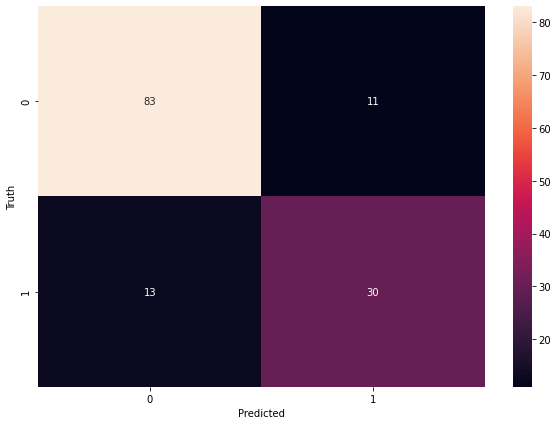

In [147]:
y_predicted=model.predict(X_test)
cm=confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [148]:
#printing the classication report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        94
           1       0.73      0.70      0.71        43

    accuracy                           0.82       137
   macro avg       0.80      0.79      0.79       137
weighted avg       0.82      0.82      0.82       137



In [149]:
#testing using custom input
#where Pregnancies=1,Glucose=150,BloodPressure=73,SkinThickness=36,Insulin=90,
#BMI=32,DiabetesPedigreeFunction=0.4,Age=40
model.predict([[1,150,73,36,90,32,0.4,40]])

array([0], dtype=int64)

In [150]:
#array([0], dtype=int64)---->indicating that person doesn't have diabetes